## Передача данных по сети

До начала занятия желательно установить, используя pip, следующие библиотеки:
- requests
- bs4

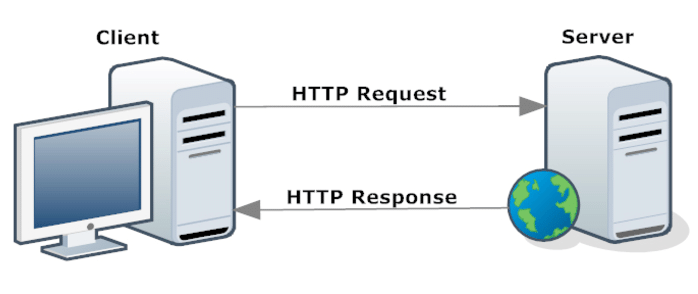

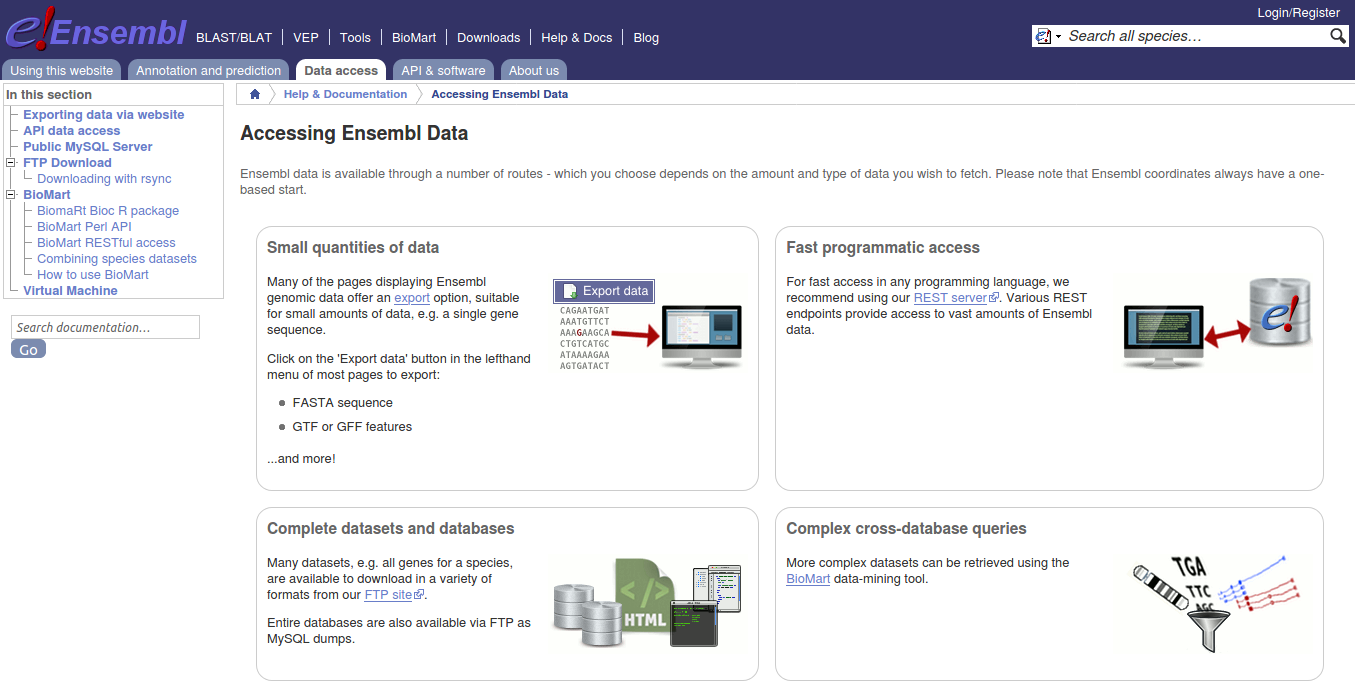

### Загрузка файлов с использованием FTP/SFTP
FTP (File Transfer Protocol) - является одним из старейших протоколов передачи файлов по сети. Данный протокол до сих пор пользуется популярностью благодаря своей простоте. Особенно в тех случаях, когда безопасность передачи данных не является главной задачей. Также данный протокол, в отличие от HTTP/HTTPS, позволяет не только передавать файлы, но и различные команды-операции над файловой системе, а также проводить аутентификацию пользователей<br/>
Для подключения к FTP-серверу необходимо воспользоваться встроенным модулем ftplib:

In [ ]:
import ftplib

ftp = ftplib.FTP('ftp.cse.buffalo.edu')
print(ftp.login())
data = ftp.retrlines('LIST')
 
print(data)

In [ ]:
ftp.cwd('mirror')
 
data = ftp.retrlines('LIST')
print(data)


Протокол FTP был изначально создан для передачи больших файлов

In [ ]:
x = ftp.retrbinary('RETR observations/metar/decoded/KORD.TXT',
open('KORD.TXT', 'wb').write)

SFTP, или «SSH File Transfer Protocol» - протокол передачи файлов по SSH. Стоит отметить, что SFTP не является, FTP с поддержкой SSH, а представляет собой отдельный протокол, специально разработанный для SSH.<br/>
В стандартной библиотеке Python нет клиентского модуля для SFTP/SCP, однако можно использовать библиотеку paramiko.

In [ ]:
import paramiko
t = paramiko.Transport((hostname, port))
t.connect(username, password)
sftp = paramiko.SFTPClient.from_transport(t)

### Передача файлов по HTTP/HTTPS
HTTP (HyperText Transfer Protocol) - наиболее популярный из протоколов передачи данных. 
Для передачи данных по протоколу HTTP/HTTPS в Python следует использовать библиотеку requests:

In [ ]:
import requests
response = requests.get("http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt")

Ответ содержит разнообразную информацию, включая заголовок, возвращенный веб-сервером; Для получения данных необходимо обратиться к свойству text ответа, содержащему тело ответа в формате строки, или к свойству content, содержащему тело ответа в формате bytes:

In [ ]:
print(response.text)

### Исользование API для получения данных

API (application programming interface) - программный интерфейс приложения. По своей сути, API является набором правил, по которым одна программа (клиент) общается с другой (сервер). Одним из таких архитектурных стилей является REST API.

#### REST (Representational State Transfer)
- Модель клиент-сервер
- Отсутствие состояния
- Кэширование
- Единообразие интерфейса
- Слои
- Код по требованию (необязательное ограничение)

Обратите внимание на то, что элементы строки запроса разделены амперсандами (&).

In [ ]:
https://pubmed.ncbi.nlm.nih.gov/?term=Transcription+regulation&filter=pubt.review&filter=years.2012-2022

### Структурированные форматы данных. JSON
JSON (JavaScript Object Notation) - один из текстовых форматов представления данных. В настоящий момент является одним из основных форматов и поддерживается всеми актуальными языками программирования. В формате JSON можно выбедить две структуры: пары ключ-значение, напоминающие словари, и упорядоченные списки значений (массивов), напоминающие списки. При этом в качетсве значений могут быть: числа, булевские значения, строки, списки и т.д.

In [ ]:
{
   "firstName": "Иван",
   "lastName": "Иванов",
   "address": {
       "streetAddress": "Московское ш., 101, кв.101",
       "city": "Ленинград",
       "postalCode": 101101
   },
   "phoneNumbers": [
       "812 123-1234",
       "916 123-4567"
   ]
}

Для работы с JSON можно исопльзовать встроенный модуль json:

In [ ]:
import json
import requests

response = requests.get("https://www.encodeproject.org/experiments/ENCSR691IZA/?format=json")
encode_json = json.loads(response.text) # переводит байтовую строку в обхект Python. т. е. возвращает словарь
print(encode_json)

In [ ]:
encode_json = response.json # эквивалентно json.loads(response.text)
print(encode_json)

Однако представление словаря в таком виде трудно читаемо. Для того, чтобы сделать представление разных структур данных более понятными, можно воспользоваться модулем pprint (prettyprint):

In [ ]:
from pprint import pprint as pp
pp(encode_json)

json воспринимается как словарь, поэтому также возможны подобные виды записи:

In [ ]:
print(encode_json['analyses'][0]['date_created'])

In [ ]:
outfile = open("encode_json.json", "w")
json.dump(encode_json, outfile) # запись json при помощи метода dump()
outfile.close()

with open("encode_json.json") as infile:
    encode_json_2 = json.load(infile) # чтение JSON'а при помощи load()

### Автоматический сбор данных (web-scrapping)

Очень часто задачу по сбору данных для анализа необходимо производить самостоятельно. Зачастую это происходит от отсутствия возможности получить данные где-либо ещё. Автоматческий сбор данных с веб-страниц в основном осуществляется засчёт "разбора" (парсинга) самих веб-страниц.

#### HyperText Markup Language (HTML) и Cascading Style Sheets (CSS)

In [ ]:
<!DOCTYPE html>
<html>
<body>

    <h1>The First Heading</h1>
    <p>The first paragraph.</p>
    <p>The second paragraph with a <a href="https://ya.ru">link to ya.ru</a></p>
    <span class="some_class">The highest priority string</span>

</body>
</html>

In [ ]:
import bs4
html = open("../files_and_images/dom_example.html").read()
bs = bs4.BeautifulSoup(html, "html.parser")

In [ ]:
list_of_p = bs("p")
print('p:', list_of_p)
list_of_a = bs("a")
print('a:', list_of_a)

In [ ]:
a_item = list_of_a[0]
print(a_item.text.replace(' ', '_'))
print(a_item.text)
print(a_item["href"])